In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("mediacompany.csv")

In [71]:
df.shape

(80, 8)

In [72]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [73]:
df.drop("Unnamed: 7", inplace=True, axis=1)

In [74]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [76]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [77]:
# Check null values in data
df.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [78]:
# Outlier detection and removal

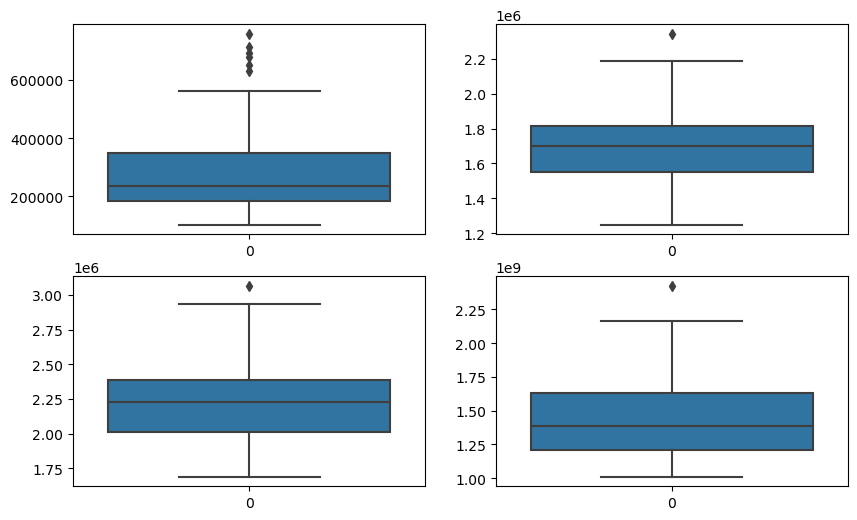

In [79]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(df['Views_show'], ax=axes[0,0])
sns.boxplot(df['Visitors'], ax=axes[0,1])
sns.boxplot(df['Views_platform'], ax=axes[1,0])
sns.boxplot(df['Ad_impression'], ax=axes[1,1])
# plt.tight_layout()
plt.show()

In [81]:
columns = df.select_dtypes(include=[np.number]).columns
# print(columns)
columns = columns[0:4]
print(columns)

Index(['Views_show', 'Visitors', 'Views_platform', 'Ad_impression'], dtype='object')


In [82]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

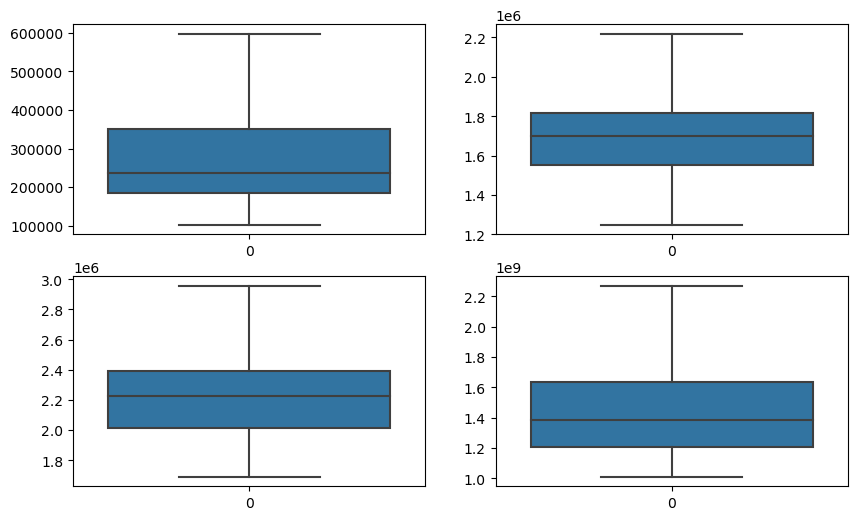

In [83]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
sns.boxplot(df['Views_show'], ax=axes[0,0])
sns.boxplot(df['Visitors'], ax=axes[0,1])
sns.boxplot(df['Views_platform'], ax=axes[1,0])
sns.boxplot(df['Ad_impression'], ax=axes[1,1])
# plt.tight_layout()
plt.show()

In [84]:
pd.value_counts(df['Cricket_match_india'])

0    72
1     8
Name: Cricket_match_india, dtype: int64

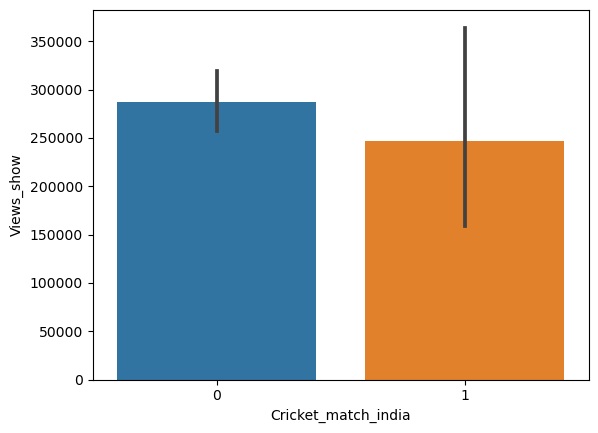

In [85]:
sns.barplot(x=df['Cricket_match_india'], y=df['Views_show'])
plt.show()

In [86]:
pd.value_counts(df['Character_A'])

0    50
1    30
Name: Character_A, dtype: int64

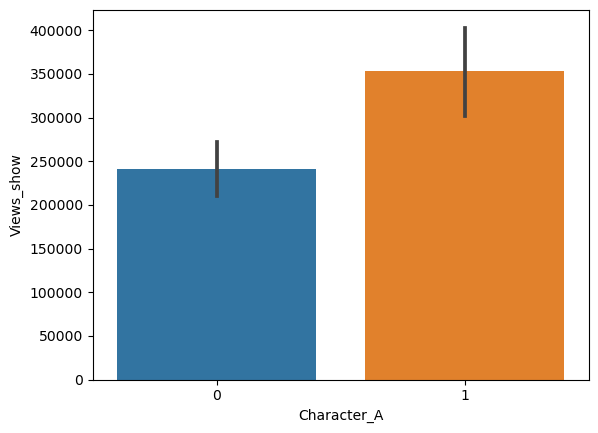

In [87]:
sns.barplot(x=df['Character_A'], y=df['Views_show'])
plt.show()

In [88]:
df.corr()

C:\Users\asus\AppData\Local\Temp\ipykernel_10796\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
Views_show,1.000000,0.516433,0.577693,0.782492,-0.087584,0.395240
Visitors,0.516433,1.000000,0.933434,0.480339,0.152171,0.218070
Views_platform,0.577693,0.933434,1.000000,0.592195,0.038633,0.452132
Ad_impression,0.782492,0.480339,0.592195,1.000000,-0.165086,0.649002
Cricket_match_india,-0.087584,0.152171,0.038633,-0.165086,1.000000,-0.258199
Character_A,0.395240,0.218070,0.452132,0.649002,-0.258199,1.000000


C:\Users\asus\AppData\Local\Temp\ipykernel_10796\221941791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


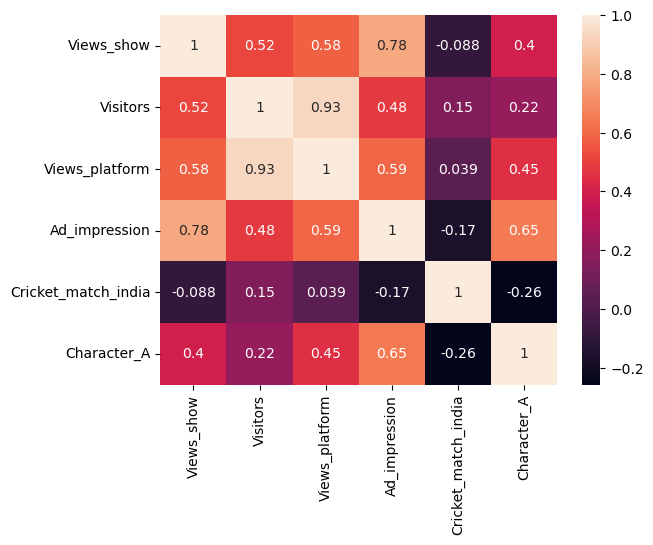

In [89]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [90]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [91]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738.0,1260228.0,1706478.0,1.060860e+09,0,0
1,3/2/2017,193763.0,1270561.0,1690727.0,1.031847e+09,0,0
2,3/3/2017,210479.0,1248183.0,1726157.0,1.010868e+09,0,0
3,3/4/2017,240061.0,1492913.0,1855353.0,1.079195e+09,1,0
4,3/5/2017,446314.0,1594712.0,2041418.0,1.357737e+09,0,0


In [92]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1:2].values

In [93]:
X[:5]

array([[1.26022800e+06, 1.70647800e+06, 1.06086045e+09, 0.00000000e+00,
        0.00000000e+00],
       [1.27056100e+06, 1.69072700e+06, 1.03184664e+09, 0.00000000e+00,
        0.00000000e+00],
       [1.24818300e+06, 1.72615700e+06, 1.01086758e+09, 0.00000000e+00,
        0.00000000e+00],
       [1.49291300e+06, 1.85535300e+06, 1.07919458e+09, 1.00000000e+00,
        0.00000000e+00],
       [1.59471200e+06, 2.04141800e+06, 1.35773699e+09, 0.00000000e+00,
        0.00000000e+00]])

In [94]:
y[:5]

array([[183738.],
       [193763.],
       [210479.],
       [240061.],
       [446314.]])

In [95]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)
y = minmax.fit_transform(y)

In [96]:
X[:5]

array([[0.01241233, 0.01245   , 0.03973034, 0.        , 0.        ],
       [0.02306045, 0.        , 0.01667249, 0.        , 0.        ],
       [0.        , 0.0280048 , 0.        , 0.        , 0.        ],
       [0.25219338, 0.13012472, 0.05430085, 1.        , 0.        ],
       [0.35709688, 0.27719538, 0.27566411, 0.        , 0.        ]])

In [97]:
y[:5]

array([[0.16419365],
       [0.1844606 ],
       [0.21825436],
       [0.27805855],
       [0.6950281 ]])

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=20)

In [99]:
x_train.shape

(60, 5)

In [105]:
regression = LinearRegression()
# regression.fit(x_train, y_train)
regression.fit(X,y)

LinearRegression()

In [106]:
# y_pred = regression.predict(x_test)
y_pred = regression.predict(X)

In [108]:
mean_squared_error(y, y_pred)

0.02600576841563366

In [110]:
r2_score(y_pred, y)

0.48661744203736745

In [117]:
y_pred = minmax.inverse_transform(y_pred)

In [118]:
y_pred[:5]

array([[116971.00807415],
       [102839.03964885],
       [101622.62267282],
       [124354.04255977],
       [258762.23499897]])

In [111]:
df['Date'] = pd.to_datetime(df['Date'])

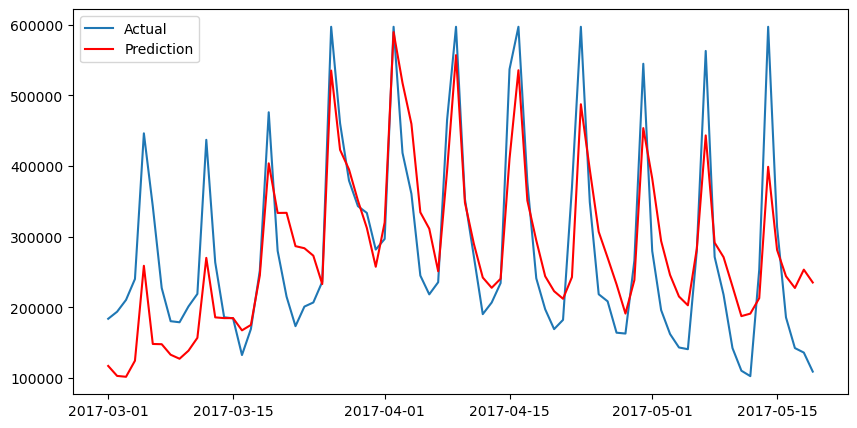

In [120]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Views_show'], label="Actual")
plt.plot(df['Date'], y_pred, 'r', label="Prediction")
plt.legend()
plt.show()

In [121]:
import statsmodels.api as sm
X = sm.add_constant(X)

# OLS - Ordinary Least Square
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     28.83
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           4.14e-16
Time:                        11:32:54   Log-Likelihood:                 32.462
No. Observations:                  80   AIC:                            -52.92
Df Residuals:                      74   BIC:                            -38.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0126      0.044     -0.287      0.7

In [125]:
X = df[['Visitors', 'Ad_impression', 'Cricket_match_india', 'Character_A']]
y = df['Views_show']

In [126]:
import statsmodels.api as sm
X = sm.add_constant(X)

# OLS - Ordinary Least Square
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     35.53
Date:                Sun, 30 Jun 2024   Prob (F-statistic):           1.25e-16
Time:                        11:36:00   Log-Likelihood:                -1017.2
No. Observations:                  80   AIC:                             2044.
Df Residuals:                      75   BIC:                             2056.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.215e+05   7